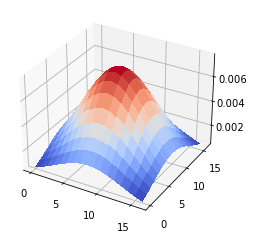

In [13]:
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.cm as cm
import numpy as np 
 
from scipy import signal 
import scipy.io as sp


def matlab_style_gauss2D(shape=(3,3),sigma=0.5):
    """
    2D gaussian mask - should give the same result as MATLAB's
    fspecial('gaussian',[shape],[sigma])
    """
    m,n = [(ss-1.)/2. for ss in shape]
    y,x = np.ogrid[-m:m+1,-n:n+1]
    h = np.exp( -(x*x + y*y) / (2.*sigma*sigma) )
    h[ h < np.finfo(h.dtype).eps*h.max() ] = 0
    sumh = h.sum()
    if sumh != 0:
        h /= sumh
    return h




fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

sigma = 5
m = 17
n = m = 17
X = np.arange(0, m, 1)
Y = np.arange(0, n, 1)
X, Y = np.meshgrid(X, Y)
flow = matlab_style_gauss2D((m,n), sigma = sigma)
#np.meshgrid(range(0,m),range(0,n),flow)
ax.plot_surface(X, Y, flow, cmap= cm.coolwarm,linewidth=0, antialiased=False)



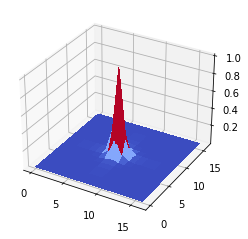

In [3]:

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
# flow_fft = np.abs(np.fft.fft2(flow))
sigma = 5
m = 17
n = m = 17
X = np.arange(0, m, 1)
Y = np.arange(0, n, 1)
X, Y = np.meshgrid(X, Y)
flow = matlab_style_gauss2D((m,n), sigma = sigma)
flow_fft = np.abs(np.fft.fft2(flow))
flow_fft = np.fft.fftshift(flow_fft)
#np.meshgrid(range(0,m),range(0,n),flow)
ax.plot_surface(X, Y, flow_fft, cmap= cm.coolwarm,linewidth=0, antialiased=False)

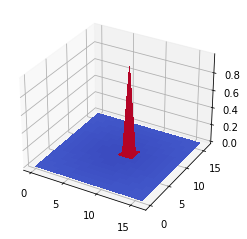

In [4]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
# flow_fft = np.abs(np.fft.fft2(flow))
sigma = 5
m = 17
n = m = 17
X = np.arange(0, m, 1)
Y = np.arange(0, n, 1)
X, Y = np.meshgrid(X, Y)
flow = matlab_style_gauss2D((m,n), sigma = sigma)
fhigh = -flow
fhigh[9,9] = fhigh[9,9]+1
#np.meshgrid(range(0,m),range(0,n),flow)
ax.plot_surface(X, Y, fhigh, cmap= cm.coolwarm,linewidth=0, antialiased=False)

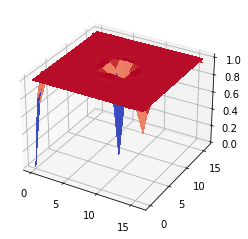

In [9]:

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
# flow_fft = np.abs(np.fft.fft2(flow))
sigma = 5
m = 17
n = m = 17
X = np.arange(0, m, 1)
Y = np.arange(0, n, 1)
X, Y = np.meshgrid(X, Y)
fhigh_noshift = np.abs(np.fft.fft2(fhigh))
fhigh_fft = np.fft.fftshift(fhigh_noshift)
#np.meshgrid(range(0,m),range(0,n),flow)

ax.plot_surface(X, Y, fhigh_noshift, cmap= cm.coolwarm,linewidth=0, antialiased=False)
ax.plot_surface(X, Y, fhigh_fft, cmap= cm.coolwarm,linewidth=0, antialiased=False)

2: Read in Idaho_grav_grid.mat and plot the gridded Bouguer
gravity map for Idaho. Use imagesc(lons,lats,grav) and colorbar for
plotting. Then overlay the outline of Idaho using
plot(Idaho.Lon,Idaho.Lat,’k’). Try to plot the map area uniformly by
using daspect and your knowledge of the approximate scaling between a
degree of latitude and longitude at 45 North.

In [16]:
grav_data = sp.loadmat('./Idaho_grav_grid.mat')

import imagesc as imagesc
imagesc(grav_data)
lon = grav_data['lon']
lat = grav_data['lat']

TypeError: 'module' object is not callable